### features:
* selected spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet of level 0

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
import itertools

In [2]:
csv_path = "/Users/ecem/Desktop/gyrocardiogram/s-vs-r/feature_extr"

## Load data

Here, our target is to predict disease correctly. So; our y will be disease column of  dataset

In [3]:
features = pd.read_csv(csv_path + "/spectral_features.csv", index_col = 0)

In [4]:
features

,SC x,SC z,SS y,SR y,SS z,SR x,SR z,SE z,SE x,SE y,SC y,E z,SS x,E x,E y
0,0.265644,4.157178e-01,0.266299,0.177344,0.311216,0.186719,8.101563e-01,2.720335,1.147296,1.137282,0.246914,3.216961,0.277956,3.076283,3.159694
1,0.279646,4.310229e-01,0.277671,0.246875,0.307812,0.203906,8.484375e-01,2.980266,1.200881,1.497325,0.276328,3.298141,0.278084,3.038338,3.238392
2,0.297894,4.308083e-01,0.274223,0.235156,0.303927,0.227344,8.351563e-01,2.967876,1.192592,1.464650,0.274229,3.299910,0.285333,3.057839,3.255923
3,0.297172,4.365125e-01,0.276357,0.260156,0.302908,0.197656,8.476562e-01,3.041578,1.046914,1.532031,0.278313,3.304233,0.287122,2.865379,3.291108
4,0.293139,4.396676e-01,0.271878,0.217969,0.302744,0.196094,8.484375e-01,3.049081,1.122829,1.396609,0.268818,3.311308,0.287785,2.932381,3.215899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,-0.342749,2.146985e-314,0.313289,-1.411189,0.317396,-0.342749,7.085093e+91,1.680623,0.277297,0.689034,-1.411189,3.289960,0.285787,3.135881,3.175903
2013,0.194755,1.242809e+151,0.270916,-1.064346,0.233114,0.194755,5.981993e-154,1.476057,1.367344,2.114864,-1.064346,1.345448,0.187350,1.590117,1.829873
2014,-0.311291,2.146985e-314,0.212103,1.797036,0.167797,-0.311291,4.056030e+232,0.663752,0.538687,0.704298,1.797036,2.099313,0.168540,1.893738,2.026987
2015,0.464122,2.146985e-314,0.216680,1.861138,0.187534,0.464122,2.181744e+243,0.412348,0.590904,0.428958,1.861138,1.494696,0.214936,1.966712,1.872642


In [5]:
features.isna().sum()

SC x    0
SC z    0
SS y    0
SR y    0
SS z    0
SR x    0
SR z    0
SE z    0
SE x    0
SE y    0
SC y    0
E z     0
SS x    0
E x     0
E y     0
dtype: int64

In [6]:
features[features == np.inf].count()

SC x    0
SC z    0
SS y    0
SR y    0
SS z    0
SR x    0
SR z    0
SE z    0
SE x    0
SE y    0
SC y    0
E z     0
SS x    0
E x     0
E y     0
dtype: int64

In [7]:
y = np.concatenate( [np.ones((1070)), np.zeros((2017))] )

In [8]:
y.shape

(3087,)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(features)

In [13]:
x_train_df = pd.DataFrame(x_train, index=features.index, columns=features.columns)


In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train_df, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [15]:
X_train

,SC x,SC z,SS y,SR y,SS z,SR x,SR z,SE z,SE x,SE y,SC y,E z,SS x,E x,E y
1304,0.340773,0.005425,0.585807,0.394800,0.743647,0.340773,0.999983,0.382454,0.286582,0.437586,0.394800,0.991983,0.617781,0.943525,0.963638
839,0.519811,0.005425,0.731202,0.497530,0.929389,0.492052,0.999983,0.272407,0.226442,0.195067,0.533753,0.881967,0.753645,0.980802,0.779093
1789,0.711713,0.005425,0.530490,0.368131,0.837283,0.711713,0.999983,0.196058,0.118962,0.284707,0.368131,0.996575,0.618533,0.958096,0.969888
761,0.535812,0.005425,0.726884,0.505232,0.894512,0.562583,0.999983,0.588222,0.561625,0.261424,0.539064,0.979435,0.810050,0.989817,0.965018
1982,0.505536,0.005425,0.726964,0.420367,0.929368,0.505536,0.999983,0.562353,0.043696,0.211058,0.420367,0.995407,0.720660,0.987720,0.910420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0.532292,0.005425,0.737363,0.601785,0.863758,0.512144,0.999983,0.929049,0.299726,0.608820,0.551993,0.977345,0.845234,0.927047,0.990534
25,0.519518,0.005425,0.655855,0.532190,0.881732,0.491912,0.999983,0.646715,0.219921,0.422685,0.536634,0.995633,0.753137,0.994567,0.995032
60,0.537809,0.005425,0.719261,0.580191,0.864253,0.531252,0.999983,0.979234,0.327579,0.568556,0.548149,0.996941,0.883282,0.969714,0.996473
224,0.538031,0.005425,0.667090,0.575652,0.868220,0.578881,0.999983,0.930501,0.533249,0.699263,0.544206,0.999467,0.828040,0.981655,0.978011


In [16]:
import xgboost as xgb
model  = xgb.XGBClassifier(random_state = 42, eval_metric = 'merror') 

# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [17]:
predictions = model.predict(X_valid)

In [18]:
classes = ['S', 'R']

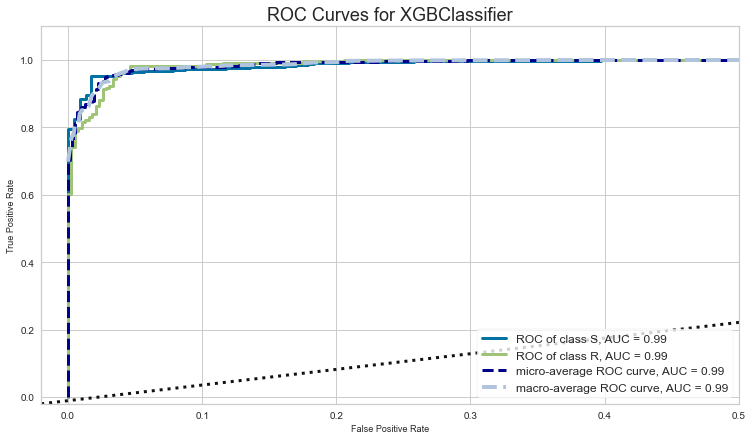

In [19]:
rocauc = ROCAUC(model, size=(900, 500), classes=classes )

rocauc.fit(X_train, y_train)       
rocauc.score(X_valid, y_valid)  
r = rocauc.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


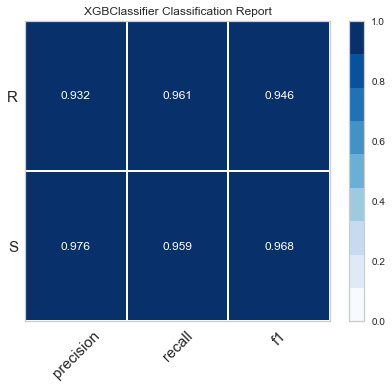

In [20]:
report = ClassificationReport(model, size=(425, 400), classes=classes, cmap = 'Blues', fontsize=15 )

report.score(X_valid, y_valid)
c = report.poof()

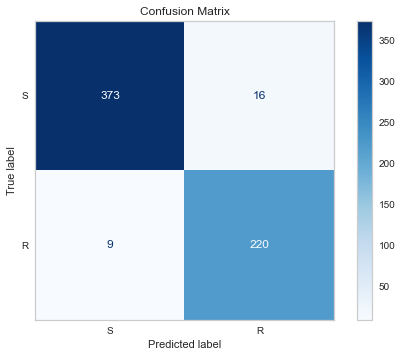

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
conf =  ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, display_labels= ['S', 'R'], cmap = 'Blues') 
conf.ax_.set_title("Confusion Matrix")
plt.grid(None)
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, predictions)
print("accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_valid, predictions, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid, predictions, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

accuracy: 95.95%
recall: 95.95%
precision: 96.00%


In [23]:
print(model.feature_importances_)

[0.218887   0.         0.06542025 0.09809601 0.07143566 0.061821
 0.         0.0613343  0.08248273 0.04930927 0.11408982 0.0478448
 0.05497197 0.04265834 0.03164883]


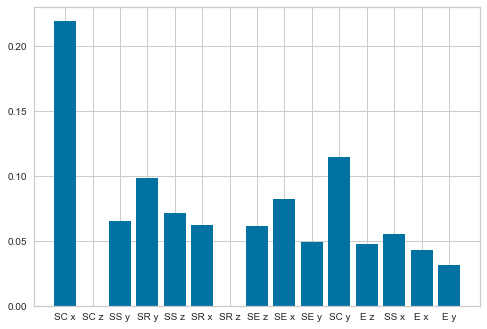

In [24]:
# plot
plt.bar(model.feature_names_in_, model.feature_importances_ )
plt.show()

In [25]:
importance = np.array([0.218887, 0.11408982,  0.09809601, 0.08248273, 0.07143566 ])

In [26]:
names = ["Spectral-Centoid x", 'Spectral-Centorid y', 'Spectral-Rolloff y', 'Spectral-Entropy  x', 'Spectral-Spread z']

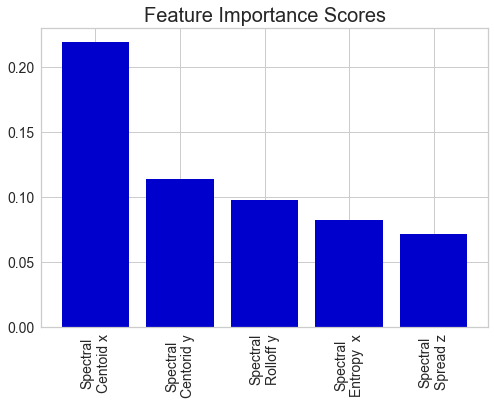

In [27]:
# plot
plt.bar(names, importance, color = "MediumBlue" )
plt.title("Feature Importance Scores", fontsize =20)
xlabels_new = [name.replace('-', '\n') for name in names]
plt.xticks(ticks =range(5), labels = xlabels_new, fontsize=14, rotation = 90)
plt.yticks(fontsize=14)
plt.show()


In [28]:
from xgboost import plot_importance;

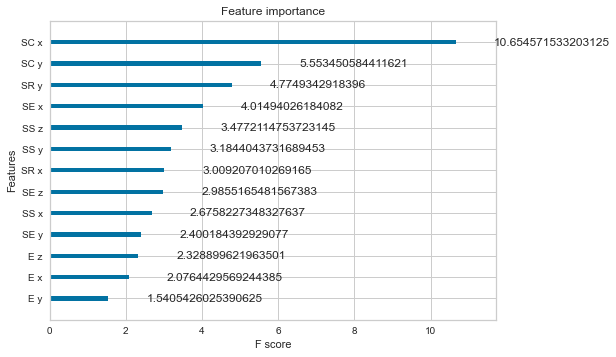

In [29]:
plot_importance(model, importance_type  = "gain")
plt.show()